# Part I: Clustering

## Load data (code)

In [ ]:
# Load the covertype dataset
from sklearn.datasets import fetch_covtype
covtype = fetch_covtype()
X = covtype.data
y = covtype.target

## Clustering methods used (text)

Mention the clustering methods used below. You should not describe them, but if they have not been discussed in the class, you should cite the source:

1. KMeans.
2. GaussianMixture.
3. Birch[1][2].
4. MiniBatchKMeans[1][3].


## Training (code)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, adjusted_mutual_info_score
import numpy as np


# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



# Define the number of clusters
n_clusters = 4

# Initialize clustering algorithms
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
gmm_diagonal = GaussianMixture(n_components=n_clusters, covariance_type='diag', random_state=42)
gmm_spherical = GaussianMixture(n_components=n_clusters, covariance_type='spherical', random_state=42)
gmm_full = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=42)
birch = Birch(branching_factor=80000, n_clusters=n_clusters)
minibatch_kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=500, random_state=42)

# Fit the clustering algorithms
kmeans.fit(X_pca)
gmm_diagonal.fit(X_pca)
gmm_spherical.fit(X_pca)
gmm_full.fit(X_pca)
birch.fit(X_pca)
minibatch_kmeans.fit(X_pca)

# Predict cluster labels
kmeans_labels = kmeans.labels_
gmm_diagonal_labels = gmm_diagonal.predict(X_pca)
gmm_spherical_labels = gmm_spherical.predict(X_pca)
gmm_full_labels = gmm_full.predict(X_pca)
birch_labels = birch.predict(X_pca)
minibatch_kmeans_labels = minibatch_kmeans.labels_



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:726: ConvergenceWarning: Number of subclusters found (3) by BIRCH is less than (4). Decrease the threshold.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Evaluation (code)

In [ ]:
# Compute evaluation metrics
kmeans_silhouette = silhouette_score(X_pca, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(X_pca, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(X_pca, kmeans_labels)
kmeans_ari = adjusted_rand_score(y, kmeans_labels)
kmeans_ami = adjusted_mutual_info_score(y, kmeans_labels)

gmm_diagonal_silhouette = silhouette_score(X_pca, gmm_diagonal_labels)
gmm_diagonal_davies_bouldin = davies_bouldin_score(X_pca, gmm_diagonal_labels)
gmm_diagonal_calinski = calinski_harabasz_score(X_pca, gmm_diagonal_labels)
gmm_diagonal_ari = adjusted_rand_score(y, gmm_diagonal_labels)
gmm_diagonal_ami = adjusted_mutual_info_score(y, gmm_diagonal_labels)

gmm_spherical_silhouette = silhouette_score(X_pca, gmm_spherical_labels)
gmm_spherical_davies_bouldin = davies_bouldin_score(X_pca, gmm_spherical_labels)
gmm_spherical_calinski = calinski_harabasz_score(X_pca, gmm_spherical_labels)
gmm_spherical_ari = adjusted_rand_score(y, gmm_spherical_labels)
gmm_spherical_ami = adjusted_mutual_info_score(y, gmm_spherical_labels)

gmm_full_silhouette = silhouette_score(X_pca, gmm_full_labels)
gmm_full_davies_bouldin = davies_bouldin_score(X_pca, gmm_full_labels)
gmm_full_calinski = calinski_harabasz_score(X_pca, gmm_full_labels)
gmm_full_ari = adjusted_rand_score(y, gmm_full_labels)
gmm_full_ami = adjusted_mutual_info_score(y, gmm_full_labels)

birch_silhouette = silhouette_score(X_pca, birch_labels)
birch_davies_bouldin = davies_bouldin_score(X_pca, birch_labels)
birch_calinski = calinski_harabasz_score(X_pca, birch_labels)
birch_ari = adjusted_rand_score(y, birch_labels)
birch_ami = adjusted_mutual_info_score(y, birch_labels)

minibatch_kmeans_silhouette = silhouette_score(X_pca, minibatch_kmeans_labels)
minibatch_kmeans_davies_bouldin = davies_bouldin_score(X_pca, minibatch_kmeans_labels)
minibatch_kmeans_calinski = calinski_harabasz_score(X_pca, minibatch_kmeans_labels)
minibatch_kmeans_ari = adjusted_rand_score(y, minibatch_kmeans_labels)
minibatch_kmeans_ami = adjusted_mutual_info_score(y, minibatch_kmeans_labels)

# Print evaluation metrics
print("KMeans Silhouette Score:", kmeans_silhouette)
print("KMeans Davies-Bouldin Score:", kmeans_davies_bouldin)
print("KMeans Calinski-Harabasz Score:", kmeans_calinski)
print("KMeans Adjusted Rand Index:", kmeans_ari)
print("KMeans Adjusted Mutual Information:", kmeans_ami)
print("\n")

print("GMM (Covariance Type: Diagonal) Silhouette Score:", gmm_diagonal_silhouette)
print("GMM (Covariance Type: Diagonal) Davies-Bouldin Score:", gmm_diagonal_davies_bouldin)
print("GMM (Covariance Type: Diagonal) Calinski-Harabasz Score:", gmm_diagonal_calinski)
print("GMM (Covariance Type: Diagonal) Adjusted Rand Index:", gmm_diagonal_ari)
print("GMM (Covariance Type: Diagonal) Adjusted Mutual Information:", gmm_diagonal_ami)
print("\n")

print("GMM (Covariance Type: Spherical) Silhouette Score:", gmm_spherical_silhouette)
print("GMM (Covariance Type: Spherical) Davies-Bouldin Score:", gmm_spherical_davies_bouldin)
print("GMM (Covariance Type: Spherical) Calinski-Harabasz Score:", gmm_spherical_calinski)
print("GMM (Covariance Type: Spherical) Adjusted Rand Index:", gmm_spherical_ari)
print("GMM (Covariance Type: Spherical) Adjusted Mutual Information:", gmm_spherical_ami)
print("\n")

print("GMM (Covariance Type: Full) Silhouette Score:", gmm_full_silhouette)
print("GMM (Covariance Type: Full) Davies-Bouldin Score:", gmm_full_davies_bouldin)
print("GMM (Covariance Type: Full) Calinski-Harabasz Score:", gmm_full_calinski)
print("GMM (Covariance Type: Full) Adjusted Rand Index:", gmm_full_ari)
print("GMM (Covariance Type: Full) Adjusted Mutual Information:", gmm_full_ami)

# Print evaluation metrics for Birch
print("\nBirch Silhouette Score:", birch_silhouette)
print("Birch Davies-Bouldin Score:", birch_davies_bouldin)
print("Birch Calinski-Harabasz Score:", birch_calinski)
print("Birch Adjusted Rand Index:", birch_ari)
print("Birch Adjusted Mutual Information:", birch_ami)
print("\n")

# Print evaluation metrics for MiniBatchKMeans
print("MiniBatchKMeans Silhouette Score:", minibatch_kmeans_silhouette)
print("MiniBatchKMeans Davies-Bouldin Score:", minibatch_kmeans_davies_bouldin)
print("MiniBatchKMeans Calinski-Harabasz Score:", minibatch_kmeans_calinski)
print("MiniBatchKMeans Adjusted Rand Index:", minibatch_kmeans_ari)
print("MiniBatchKMeans Adjusted Mutual Information:", minibatch_kmeans_ami)


KMeans Silhouette Score: 0.8061485493848575
KMeans Davies-Bouldin Score: 0.3211894303481856
KMeans Calinski-Harabasz Score: 5202598.469345479
KMeans Adjusted Rand Index: 0.03296797383687666
KMeans Adjusted Mutual Information: 0.10060848213246107


GMM (Covariance Type: Diagonal) Silhouette Score: 0.8060480394379612
GMM (Covariance Type: Diagonal) Davies-Bouldin Score: 0.3215610331936283
GMM (Covariance Type: Diagonal) Calinski-Harabasz Score: 5191502.417201264
GMM (Covariance Type: Diagonal) Adjusted Rand Index: 0.03294151080269196
GMM (Covariance Type: Diagonal) Adjusted Mutual Information: 0.10056284134981296


GMM (Covariance Type: Spherical) Silhouette Score: 0.8056391212197778
GMM (Covariance Type: Spherical) Davies-Bouldin Score: 0.32274371706800453
GMM (Covariance Type: Spherical) Calinski-Harabasz Score: 5160606.49845991
GMM (Covariance Type: Spherical) Adjusted Rand Index: 0.033057972592505425
GMM (Covariance Type: Spherical) Adjusted Mutual Information: 0.10065640146845097




# Part II: Classification

Mention the classification methods used below. You should not describe them, but if they have not been discussed in the class, you should cite the source:


1.   Random Forest Classifier.
2.   Logistic Regression[1][5].
3.   Decision Tree Classifier.
4.   K Neighbors Classifier[1][7].
5.   Extra Trees Classifier[1][6].
6.   GaussianNB[1][4].

## Training (code)

In [13]:
#importing dataset fetch_covtype
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split

#importing classifiers used
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve

#importing python libraries for visualisation
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# importing pre-processor for logistic regression
from sklearn.preprocessing import label_binarize, MinMaxScaler

# Load the dataset
covtype = fetch_covtype()
X, y = covtype.data, covtype.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


# Calculate class weights to address class imbalance
class_weights = {}
for class_label in np.unique(y_train):
    class_weight = len(y_train) / (len(np.unique(y_train)) * np.sum(y_train == class_label))
    class_weights[class_label] = class_weight

# Scale the data for logistic regression
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifiers = {
    # Done manual hyper-parameter tuning with the reference of scikit-learn as mentioned in the references section
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=50, min_samples_split=20, n_jobs=-1, random_state=42, class_weight=class_weights),
    "Decision Tree Classifier": DecisionTreeClassifier(max_depth=30,min_samples_split=30,random_state=42, class_weight=class_weights),
    "Logistic Regression": LogisticRegression(max_iter=150,n_jobs=8,random_state=42),
    "K Neighbors Classifier": KNeighborsClassifier(n_neighbors=3,weights='distance',n_jobs=8),
    "Extra tree classifier": ExtraTreesClassifier(n_estimators=50, max_depth=40, n_jobs=-1, random_state=42, class_weight=class_weights),
    "GaussianNB": GaussianNB()
}

for clf_name, clf in classifiers.items():
  # Train the classifier on the training data
  if clf_name == "Logistic Regression":
     clf.fit(X_train_scaled, y_train, sample_weight=[class_weights[label] for label in y_train])
  else:
     clf.fit(X_train, y_train)

## Evaluation (code)

In [ ]:
# Below codes are referenced from scikit library[9]

print("Evaluation Report for the classifiers used:")
for clf_name, clf in classifiers.items():
  # Predict for testing
  if clf_name == "Logistic Regression":
     y_pred_test = clf.predict(X_test_scaled)
  else:
     y_pred_test = clf.predict(X_test)

  # Calculate Balanced Accuracy
  balanced_accuracy = balanced_accuracy_score(y_test, y_pred_test)

  # Calculate ROC AUC
  if clf_name == "Logistic Regression":
     roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_scaled), multi_class='ovr')
  else:
     roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

  # Calculate Precision, recall and F1 Score
  precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)
  recall = recall_score(y_test, y_pred_test, average='weighted')
  f1 = f1_score(y_test, y_pred_test, average='weighted')

  print(f"{clf_name}:")
  print("Balanced Accuracy:", balanced_accuracy)
  print("ROC AUC:", roc_auc)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 Score:", f1)
  print("\n")

Evaluation Report for the classifiers used:
Random Forest:
Balanced Accuracy: 0.930916861252589
ROC AUC: 0.9957792735801684
Precision: 0.9354887904775906
Recall: 0.9341287271175122
F1 Score: 0.9344979709920344


Decision Tree Classifier:
Balanced Accuracy: 0.9001440422822923
ROC AUC: 0.9649697996263579
Precision: 0.9065282956766061
Recall: 0.8991001907017411
F1 Score: 0.9012082792534128


Logistic Regression:
Balanced Accuracy: 0.7035492108395921
ROC AUC: 0.925213818756066
Precision: 0.704537651565276
Recall: 0.59795666870908
F1 Score: 0.6269939773431251


K Neighbors Classifier:
Balanced Accuracy: 0.930969523072223
ROC AUC: 0.9908190261134343
Precision: 0.9682349487920929
Recall: 0.968282927030767
F1 Score: 0.968246855409061


Extra tree classifier:
Balanced Accuracy: 0.9085369653385473
ROC AUC: 0.9966721684272469
Precision: 0.9483565575627491
Recall: 0.9483108782606899
F1 Score: 0.9481656815857223


GaussianNB:
Balanced Accuracy: 0.5912152762369016
ROC AUC: 0.8873989422427097
Precisi

**ROC Curves for all classifiers - Classwise:**

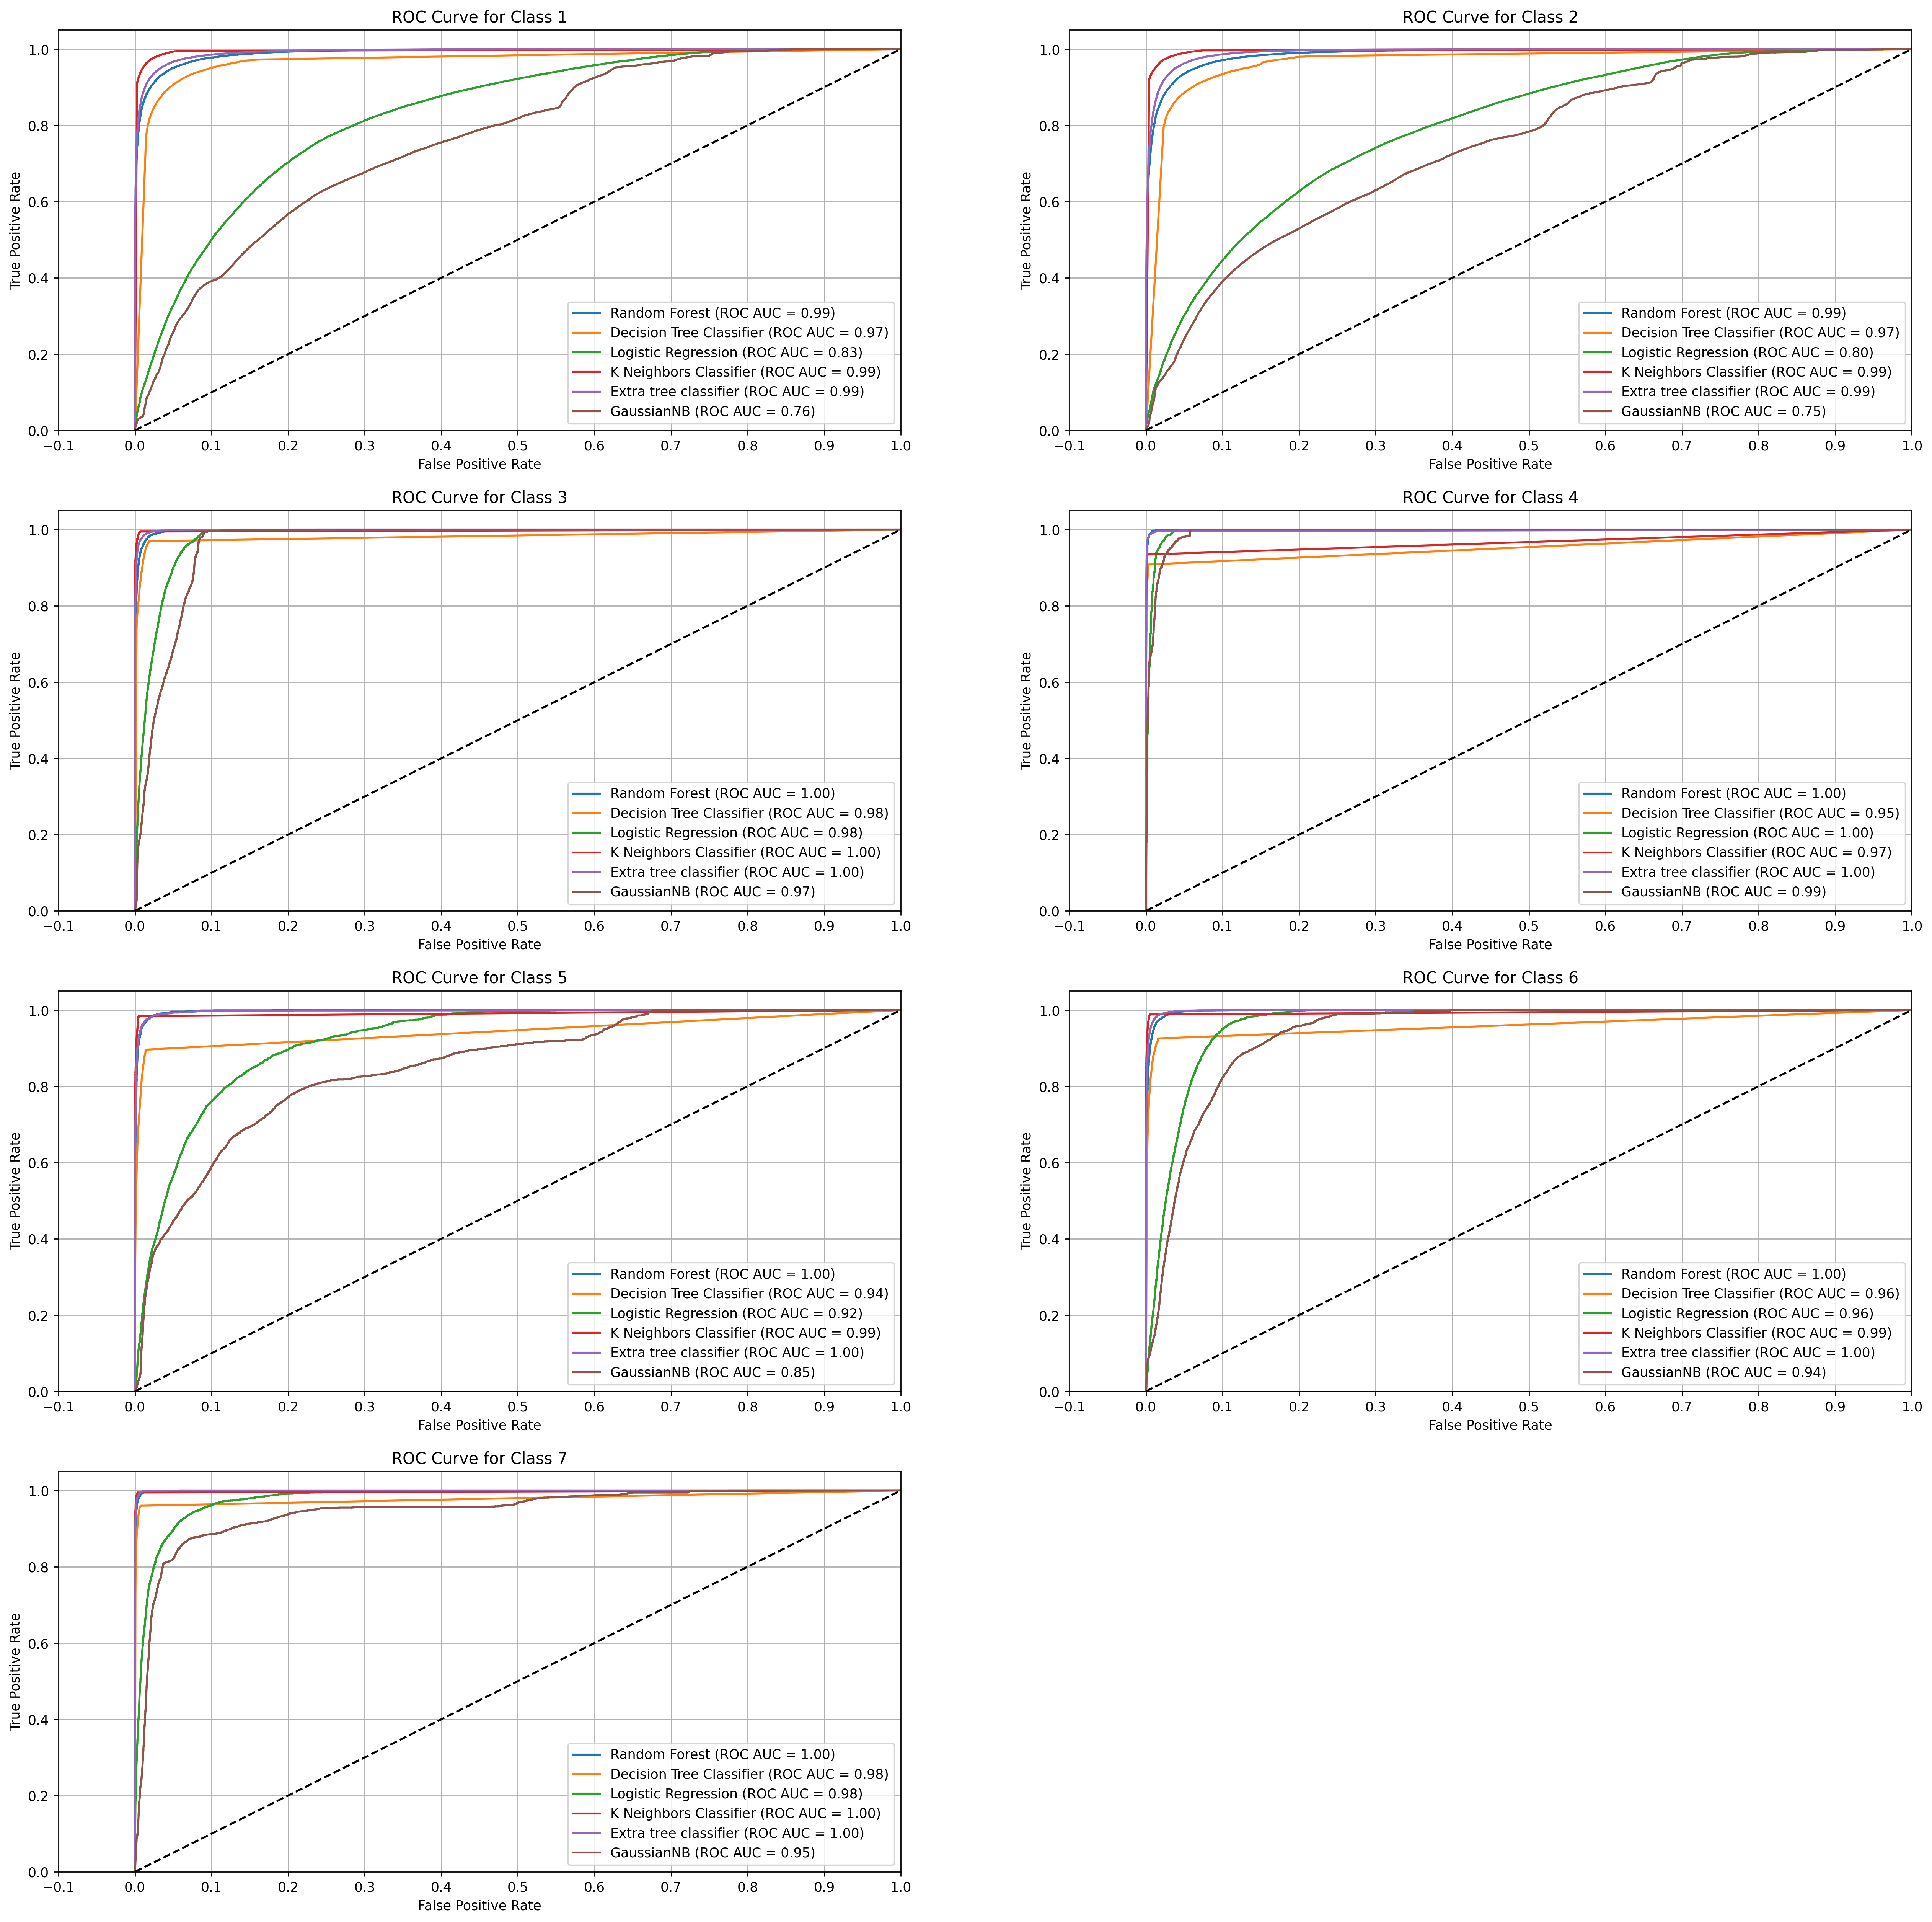

In [ ]:
# ROC AUC referenced from [10]
plt.figure(figsize=(25, 25), dpi=250)
for class_label in range(len(np.unique(y_test))):
    plt.subplot(4, 2, class_label+1)
    # Binarize the labels for the current class
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
    y_test_binarized = y_test_binarized[:, class_label]

    # Compute ROC curve and ROC area for each classifier
    for clf_name, clf in classifiers.items():
        if clf_name == "Logistic Regression":
            fpr, tpr, _ = roc_curve(y_test_binarized, clf.predict_proba(X_test_scaled)[:, class_label])
            roc_auc = roc_auc_score(y_test_binarized, clf.predict_proba(X_test_scaled)[:, class_label])
        else:
            fpr, tpr, _ = roc_curve(y_test_binarized, clf.predict_proba(X_test)[:, class_label])
            roc_auc = roc_auc_score(y_test_binarized, clf.predict_proba(X_test)[:, class_label])
        plt.plot(fpr, tpr, label='{} (ROC AUC = {:.2f})'.format(clf_name, roc_auc))

    #plt.plot(0,x,ls='dashdot',color='black')
    plt.plot([0.0, 1], [0.0, 1], color='black', linestyle='dashed')
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xticks([-0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
    plt.xlabel('False Positive Rate',fontsize=10)
    plt.ylabel('True Positive Rate',fontsize=10)
    plt.title('ROC Curve for Class {}'.format(class_label+1),fontsize=12)
    plt.legend(loc="lower right")
    plt.grid(True)
plt.show()

**Confusion Matrix for all the classifiers:**

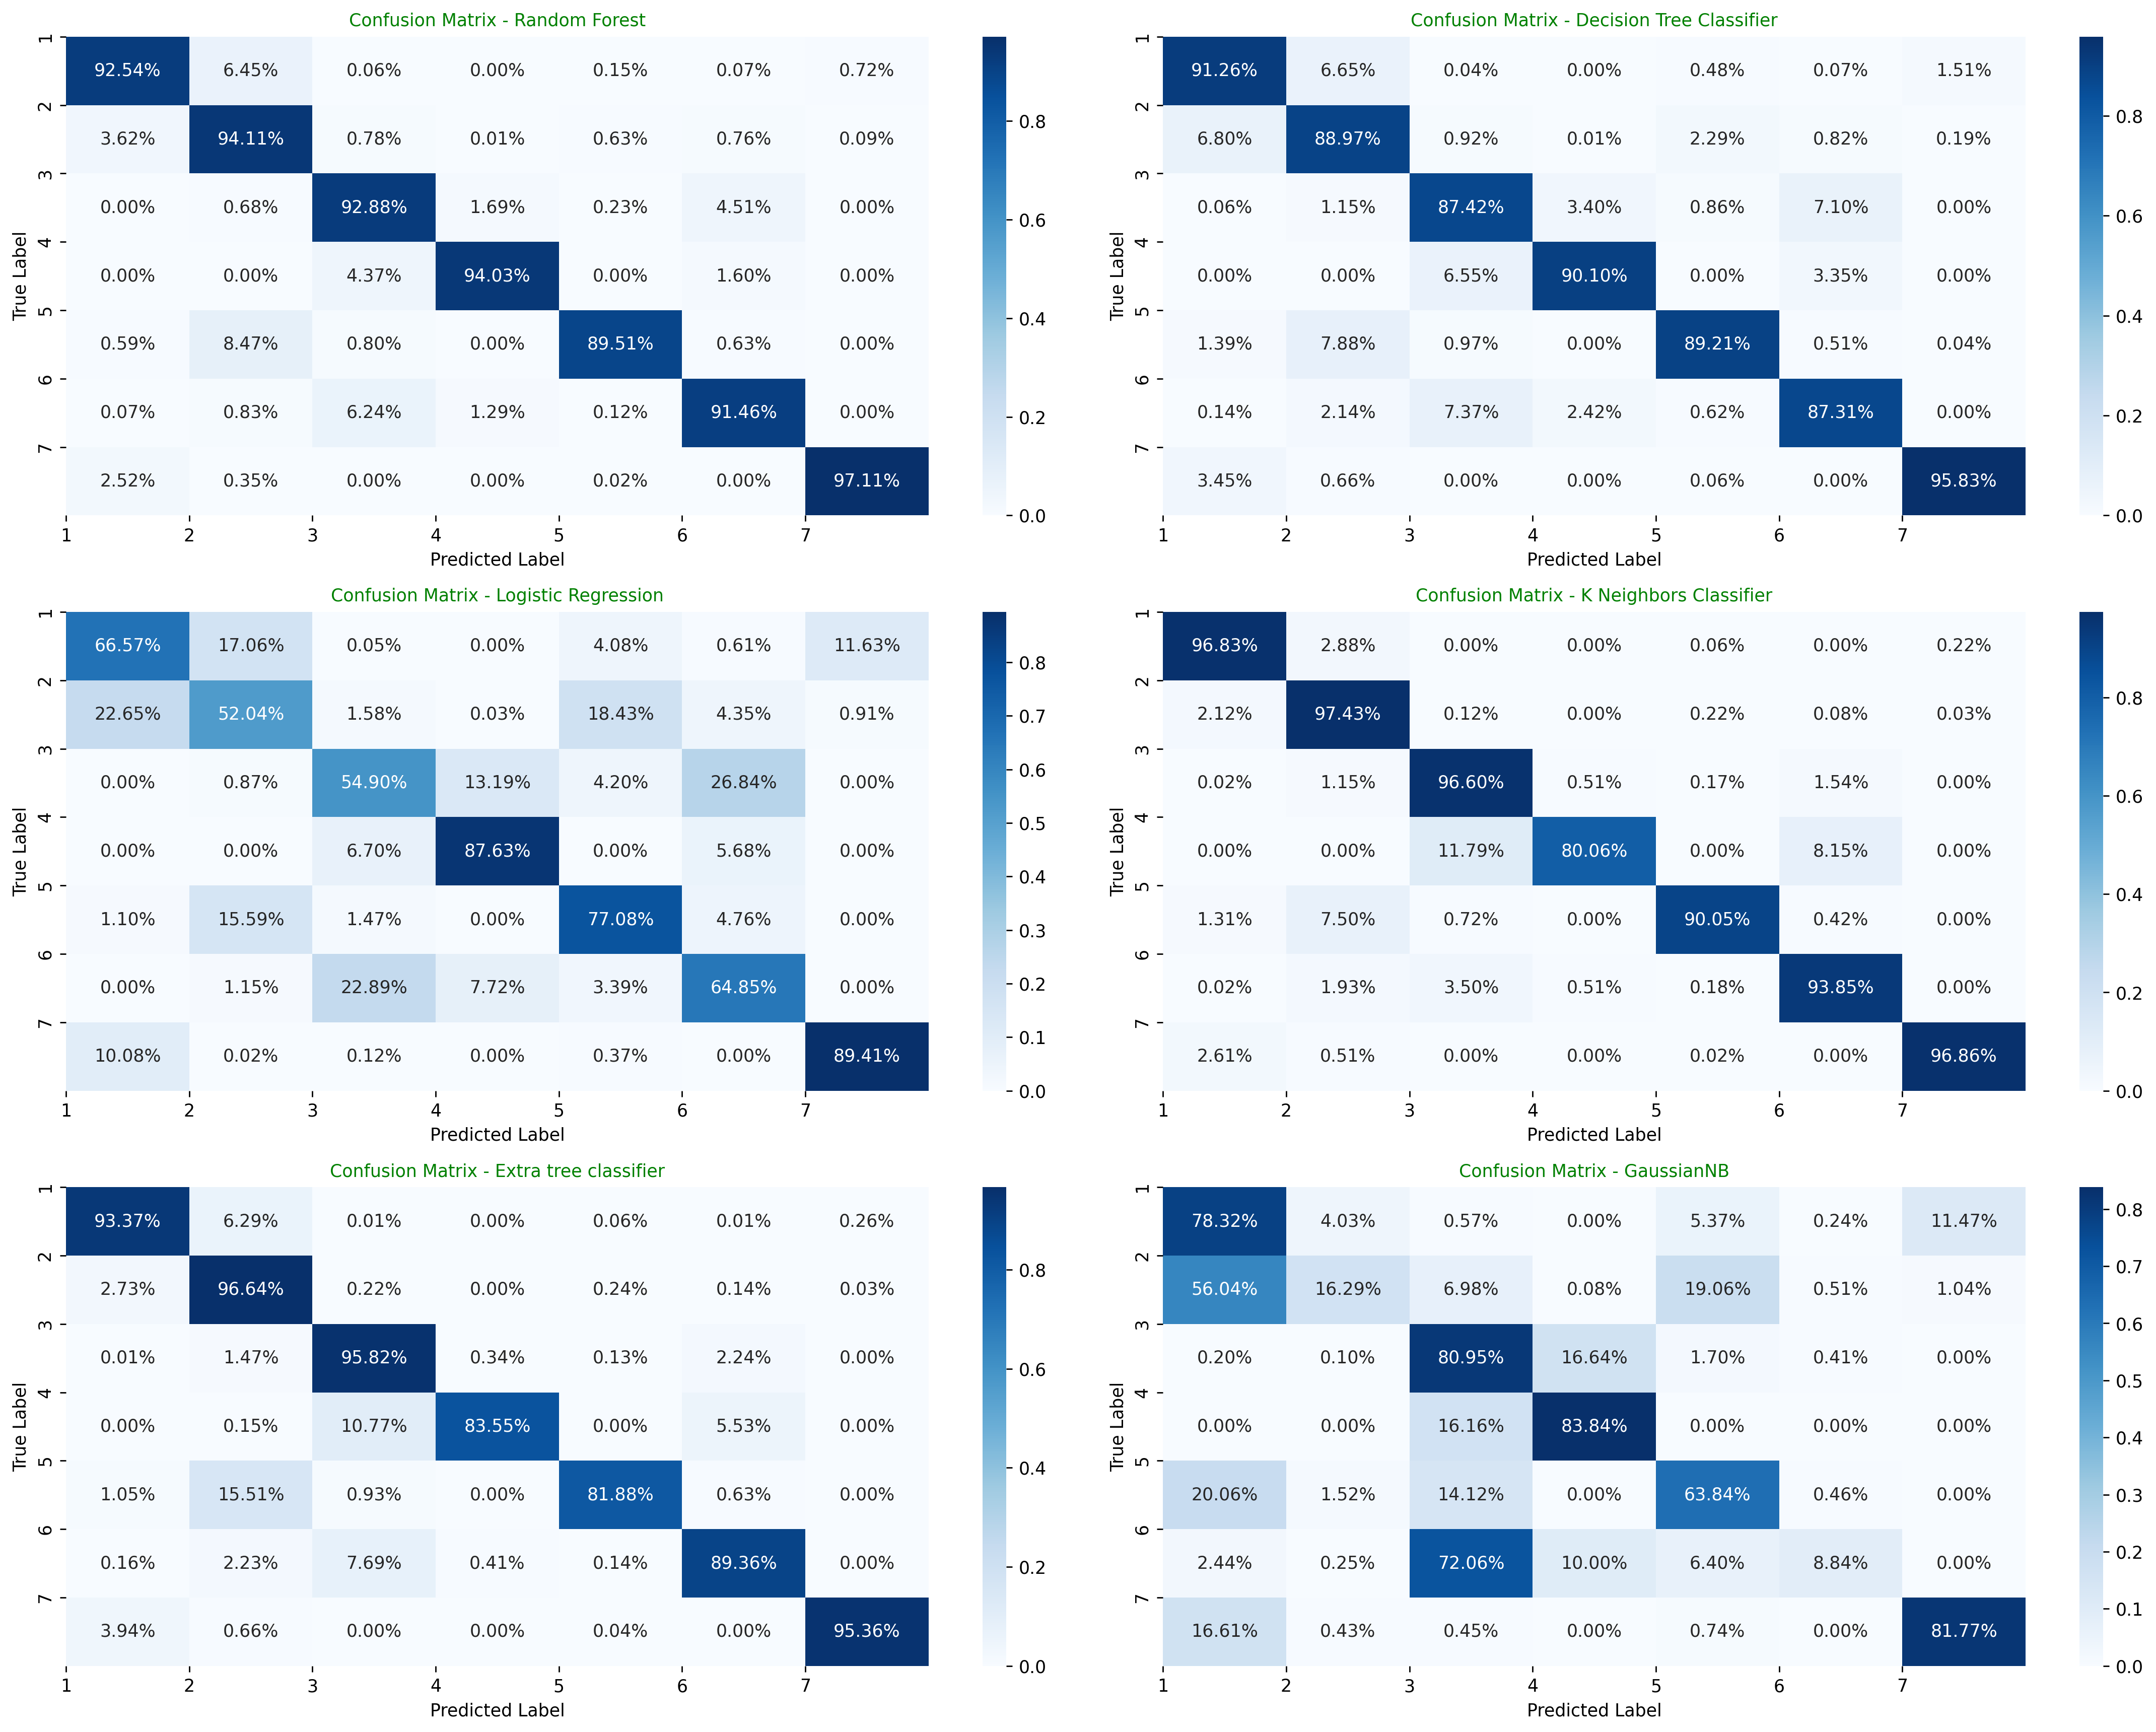

In [ ]:
plt.figure(figsize=(18, 18),dpi=250)
for i, (name, clf) in enumerate(classifiers.items(), 0):
    plt.subplot(4, 2, i+1)

    if name == "Logistic Regression":
      y_pred_test = clf.predict(X_test_scaled)
    else:
      y_pred_test = clf.predict(X_test)

    conf_matrix = confusion_matrix(y_test, y_pred_test)

    # Normalize confusion matrix to percentage
    conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

    plt.title(f"Confusion Matrix - {name}",fontsize=10,color='green')
    sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2%', cmap='Blues', cbar=True)
    tick_marks = np.arange(len(np.unique(y)))
    plt.xticks(tick_marks, np.unique(y))
    plt.yticks(tick_marks, np.unique(y))
    plt.xlabel('Predicted Label',fontsize=10)
    plt.ylabel('True Label',fontsize=10)
    plt.tight_layout()

plt.show()

**K-FOLD Cross Validation to compare evaluation metrics before and after CV:**

In [2]:
# Performing Stratified Kfold evaluation[8]
from sklearn.model_selection import cross_val_score, StratifiedKFold
from tabulate import tabulate

# Define an empty list to store results
results = []

stk_folds = 3
# Creating a stratifiedk-fold cross-validation object.
stkf = StratifiedKFold(n_splits=stk_folds, shuffle=True, random_state=42)

for clf_name, clf in classifiers.items():
    if clf_name == "Logistic Regression":
      y_pred_test = clf.predict(X_test_scaled)
    else:
      y_pred_test = clf.predict(X_test)

    bc_before_cv = balanced_accuracy_score(y_test, y_pred_test)
    # Performing StratifiedK-fold cross-validation
    bc_score = cross_val_score(clf, X, y, cv=stkf, scoring='balanced_accuracy')
    bc_after_cv = np.mean(bc_score)

    # Append results to the list
    results.append([clf_name, bc_before_cv, bc_after_cv])

# Print the results in a table format
print(tabulate(results, headers=["Classifier", " Balanced Accuracy Before CV", "Balanced Accuracy After CV (Mean)"], tablefmt="grid"))


+--------------------------+--------------------------------+-------------------------------------+
| Classifier               |    Balanced Accuracy Before CV |   Balanced Accuracy After CV (Mean) |
+==========================+================================+=====================================+
| Random Forest            |                       0.930917 |                            0.925637 |
+--------------------------+--------------------------------+-------------------------------------+
| Decision Tree Classifier |                       0.900144 |                            0.898694 |
+--------------------------+--------------------------------+-------------------------------------+
| Logistic Regression      |                       0.703549 |                            0.261063 |
+--------------------------+--------------------------------+-------------------------------------+
| K Neighbors Classifier   |                       0.93097  |                            0.929068 |


In [3]:
# Performing Stratified Kfold evaluation[8].
from sklearn.model_selection import cross_val_score, StratifiedKFold
from tabulate import tabulate

# Define an empty list to store results
results1 = []

stk_folds = 3
# Creating a stratifiedk-fold cross-validation object.
stkf = StratifiedKFold(n_splits=stk_folds, shuffle=True, random_state=42)

for clf_name, clf in classifiers.items():
     if clf_name == "Logistic Regression":
        roc_auc_before_cv = roc_auc_score(y_test, clf.predict_proba(X_test_scaled), multi_class='ovr')
     else:
        roc_auc_before_cv = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

     # Performing StratifiedK-fold cross-validation
     roc_auc_cv_score = cross_val_score(clf, X, y, cv=stkf, scoring='roc_auc_ovr')
     roc_auc_after_cv = np.mean(roc_auc_cv_score)

     # Append results to the list
     results1.append([clf_name, roc_auc_before_cv, roc_auc_after_cv])

# Print the results in a table format
print(tabulate(results1, headers=["Classifier", " ROC AUC Before CV", "ROC AUC After CV (Mean)"], tablefmt="grid"))


+--------------------------+----------------------+---------------------------+
| Classifier               |    ROC AUC Before CV |   ROC AUC After CV (Mean) |
+==========================+======================+===========================+
| Random Forest            |             0.995779 |                  0.995469 |
+--------------------------+----------------------+---------------------------+
| Decision Tree Classifier |             0.96497  |                  0.964706 |
+--------------------------+----------------------+---------------------------+
| Logistic Regression      |             0.925214 |                  0.817173 |
+--------------------------+----------------------+---------------------------+
| K Neighbors Classifier   |             0.990819 |                  0.991216 |
+--------------------------+----------------------+---------------------------+
| Extra tree classifier    |             0.996672 |                  0.996526 |
+--------------------------+------------

In [14]:
# Define an empty list to store results
results2 = []

stk_folds = 3
# Creating a stratifiedk-fold cross-validation object.
stkf = StratifiedKFold(n_splits=stk_folds, shuffle=True, random_state=42)

for clf_name, clf in classifiers.items():
     if clf_name == "Logistic Regression":
      y_pred_test = clf.predict(X_test_scaled)
     else:
      y_pred_test = clf.predict(X_test)

     f1_before_cv = round(f1_score(y_test, y_pred_test, average='weighted'),2)

     # Performing StratifiedK-fold cross-validation
     f1_score_cv = cross_val_score(clf, X, y, cv=stkf, scoring='f1_weighted')
     f1_before_cv = round(f1_score_cv.mean(),2)

     # Append results to the list
     results2.append([clf_name, f1_before_cv, f1_before_cv])

# Print the results in a table format
print(tabulate(results2, headers=["Classifier", " F1 Score Before CV", "F1 Score After CV (Mean)"], tablefmt="grid"))


+--------------------------+-----------------------+----------------------------+
| Classifier               |    F1 Score Before CV |   F1 Score After CV (Mean) |
+==========================+=======================+============================+
| Random Forest            |                  0.93 |                       0.93 |
+--------------------------+-----------------------+----------------------------+
| Decision Tree Classifier |                  0.9  |                       0.9  |
+--------------------------+-----------------------+----------------------------+
| Logistic Regression      |                  0.6  |                       0.6  |
+--------------------------+-----------------------+----------------------------+
| K Neighbors Classifier   |                  0.97 |                       0.97 |
+--------------------------+-----------------------+----------------------------+
| Extra tree classifier    |                  0.95 |                       0.95 |
+---------------

# References (text)


[1] Pedregosa et al., "Scikit-learn: Machine Learning in Python," Journal of Machine Learning Research, vol. 12, pp. 2825-2830, 2011.
Website: https://scikit-learn.org/stable/about.html#citing-scikit-learn

[2] Scikit-learn, "sklearn.cluster.Birch," Scikit-learn Documentation. Available: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html.

[3] Scikit-learn, "sklearn.cluster.MiniBatchKMeans," Scikit-learn Documentation. Available: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html.

[4] "Naive Bayes (GaussianNB)", Scikit-learn: Machine Learning in Python., Available: https://scikit-learn.org/stable/modules/naive_bayes.html.

[5]  "Linear Models (Logistic Regression)", Scikit-learn: Machine Learning in Python. Available: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

[6] Scikit-learn, "sklearn.ensemble.ExtraTreesClassifier," Scikit-learn Documentation. Available: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html.


[7] scikit-learn developers, ""sklearn.neighbors.KNeighborsClassifier - scikit-learn 0.24.0 documentation". scikit-learn: Machine Learning in Python, 2021.Available: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

[8] Scikit-learn, "sklearn.model_selection.StratifiedKFold," Scikit-learn Documentation. Available: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold.

[9] scikit-learn. (n.d.). Model evaluation: quantifying the quality of predictions. [Online]. Available: https://scikit-learn.org/stable/modules/model_evaluation.html

[10] scikit-learn. (Year). Plot ROC curve example. [Online]. Available: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
